In [2]:
import sys

sys.path.append( '/home/sedley/Work/FuzzingBook/fuzzingbook/notebooks/' )

import bookutils

In [3]:
def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
    }

    t = ""
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%':
            digit_high, digit_low = s[i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError("Invalid encoding")
        else:
            t += c
        i += 1
    return t

In [4]:
cgi_decode("Hello+world")

'Hello world'

In [5]:
assert cgi_decode('+') == ' '
assert cgi_decode('%20') == ' '
assert cgi_decode('abc') == 'abc'

try:
    cgi_decode('%?a')
    assert False
except ValueError:
    pass

In [6]:
cgi_decode("a+b")

'a b'

In [7]:
from types import FrameType, TracebackType
from typing import Optional, Callable, Tuple, Any, Type, List, Set

In [8]:
coverage = []

def traceit(frame: FrameType, event: str, arg: Any) -> Optional[Callable]:
    """Trace program execution. To be passed to sys.settrace()."""
    if event == 'line':
        global coverage
        function_name = frame.f_code.co_name
        lineno = frame.f_lineno
        coverage.append(lineno)

    return traceit

In [9]:
def cgi_decode_traced(s: str) -> None:
    global coverage
    coverage = []
    sys.settrace(traceit)  # Turn on
    cgi_decode(s)
    sys.settrace(None)    # Turn off

In [10]:
cgi_decode_traced("a+b")
print(coverage)

[8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 10, 8, 10, 8, 10, 8, 10, 8, 10, 8, 11, 8, 11, 8, 11, 8, 11, 8, 11, 8, 11, 8, 12, 8, 12, 8, 15, 16, 17, 18, 19, 21, 30, 31, 17, 18, 19, 20, 31, 17, 18, 19, 21, 30, 31, 17, 32]


In [11]:
import inspect

In [12]:
cgi_decode_code = inspect.getsource(cgi_decode)

In [13]:
from bookutils import print_content, print_file

In [14]:
print_content(cgi_decode_code[:300] + "...", ".py")

def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_v...

In [15]:
cgi_decode_lines = [""] + cgi_decode_code.splitlines()

In [16]:
cgi_decode_lines[1]

'def cgi_decode(s: str) -> str:'

In [17]:
cgi_decode_lines[9:13]

["        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,",
 "        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,",
 "        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,",
 "        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,"]

In [18]:
cgi_decode_lines[15]

'    t = ""'

In [19]:
covered_lines = set(coverage)
print(covered_lines)

{32, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 30, 31}


In [20]:
for lineno in range(1, len(cgi_decode_lines)):
    if lineno not in covered_lines:
        print("# ", end="")
    else:
        print("  ", end="")
    print("%2d  " % lineno, end="")
    print_content(cgi_decode_lines[lineno], '.py')
    print()

#  1  def cgi_decode(s: str) -> str:
#  2      """Decode the CGI-encoded string `s`:
#  3         * replace '+' by ' '
#  4         * replace "%xx" by the character with hex number xx.
#  5         Return the decoded string.  Raise `ValueError` for invalid inputs."""
#  6  
#  7      # Mapping of hex digits to their integer values
   8      hex_values = {
   9          '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
  10          '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
  11          'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
  12          'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
# 13      }
# 14  
  15      t = ""
  16      i = 0
  17      while i < len(s):
  18          c = s[i]
  19          if c == '+':
  20              t += ' '
  21          elif c == '%':
# 22              digit_high, digit_low = s[i + 1], s[i + 2]
# 23              i += 2
# 24              if digit_high in hex_values and digit_low in hex_values:
# 25                  v = hex_values[digit_high] * 

In [21]:
with Coverage() as cov:
    function_to_be_traced()
c = cov.coverage()

NameError: name 'Coverage' is not defined

In [22]:
Location = Tuple[str, int]

In [23]:
class Coverage:
    """Track coverage within a `with` block. Use as
    ```
    with Coverage() as cov:
        function_to_be_traced()
    c = cov.coverage()
    ```
    """

    def __init__(self) -> None:
        """Constructor"""
        self._trace: List[Location] = []

    # Trace function
    def traceit(self, frame: FrameType, event: str, arg: Any) -> Optional[Callable]:
        """Tracing function. To be overloaded in subclasses."""
        if self.original_trace_function is not None:
            self.original_trace_function(frame, event, arg)

        if event == "line":
            function_name = frame.f_code.co_name
            lineno = frame.f_lineno
            if function_name != '__exit__':  # avoid tracing ourselves:
                self._trace.append((function_name, lineno))

        return self.traceit

    def __enter__(self) -> Any:
        """Start of `with` block. Turn on tracing."""
        self.original_trace_function = sys.gettrace()
        sys.settrace(self.traceit)
        return self

    def __exit__(self, exc_type: Type, exc_value: BaseException, 
                 tb: TracebackType) -> Optional[bool]:
        """End of `with` block. Turn off tracing."""
        sys.settrace(self.original_trace_function)
        return None  # default: pass all exceptions

    def trace(self) -> List[Location]:
        """The list of executed lines, as (function_name, line_number) pairs"""
        return self._trace

    def coverage(self) -> Set[Location]:
        """The set of executed lines, as (function_name, line_number) pairs"""
        return set(self.trace())

    def function_names(self) -> Set[str]:
        """The set of function names seen"""
        return set(function_name for (function_name, line_number) in self.coverage())

    def __repr__(self) -> str:
        """Return a string representation of this object.
           Show covered (and uncovered) program code"""
        t = ""
        for function_name in self.function_names():
            # Similar code as in the example above
            try:
                fun = eval(function_name)
            except Exception as exc:
                t += f"Skipping {function_name}: {exc}"
                continue

            source_lines, start_line_number = inspect.getsourcelines(fun)
            for lineno in range(start_line_number, start_line_number + len(source_lines)):
                if (function_name, lineno) in self.trace():
                    t += "# "
                else:
                    t += "  "
                t += "%2d  " % lineno
                t += source_lines[lineno - start_line_number]

        return t

In [24]:
with Coverage() as cov:
    cgi_decode("a+b")

print(cov.coverage())

{('cgi_decode', 9), ('cgi_decode', 15), ('cgi_decode', 12), ('cgi_decode', 18), ('cgi_decode', 8), ('cgi_decode', 31), ('cgi_decode', 21), ('cgi_decode', 11), ('cgi_decode', 17), ('cgi_decode', 30), ('cgi_decode', 20), ('cgi_decode', 10), ('cgi_decode', 32), ('cgi_decode', 16), ('cgi_decode', 19)}


In [25]:
print(cov)

   1  def cgi_decode(s: str) -> str:
   2      """Decode the CGI-encoded string `s`:
   3         * replace '+' by ' '
   4         * replace "%xx" by the character with hex number xx.
   5         Return the decoded string.  Raise `ValueError` for invalid inputs."""
   6  
   7      # Mapping of hex digits to their integer values
#  8      hex_values = {
#  9          '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
# 10          '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
# 11          'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
# 12          'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
  13      }
  14  
# 15      t = ""
# 16      i = 0
# 17      while i < len(s):
# 18          c = s[i]
# 19          if c == '+':
# 20              t += ' '
# 21          elif c == '%':
  22              digit_high, digit_low = s[i + 1], s[i + 2]
  23              i += 2
  24              if digit_high in hex_values and digit_low in hex_values:
  25                  v = hex_values[digit_high] * 

In [26]:
with Coverage() as cov_plus:
    cgi_decode("a+b")
with Coverage() as cov_standard:
    cgi_decode("abc")

cov_plus.coverage() - cov_standard.coverage()

{('cgi_decode', 20)}

In [27]:
with Coverage() as cov_max:
    cgi_decode('+')
    cgi_decode('%20')
    cgi_decode('abc')
    try:
        cgi_decode('%?a')
    except Exception:
        pass

In [28]:
cov_max.coverage() - cov_plus.coverage()

{('cgi_decode', 22),
 ('cgi_decode', 23),
 ('cgi_decode', 24),
 ('cgi_decode', 25),
 ('cgi_decode', 26),
 ('cgi_decode', 28)}

In [29]:
from Fuzzer import fuzzer

sample = fuzzer()
sample

'!7#%"*#0=)$;%6*;>638:*>80"=</>(/*:-(2<4 !:5*6856&?""11<7+%<%7,4.8,*+&,,$,."'

In [30]:
with Coverage() as cov_fuzz:
    try:
        cgi_decode(sample)
    except:
        pass
cov_fuzz.coverage()

{('cgi_decode', 8),
 ('cgi_decode', 9),
 ('cgi_decode', 10),
 ('cgi_decode', 11),
 ('cgi_decode', 12),
 ('cgi_decode', 15),
 ('cgi_decode', 16),
 ('cgi_decode', 17),
 ('cgi_decode', 18),
 ('cgi_decode', 19),
 ('cgi_decode', 21),
 ('cgi_decode', 22),
 ('cgi_decode', 23),
 ('cgi_decode', 24),
 ('cgi_decode', 28),
 ('cgi_decode', 30),
 ('cgi_decode', 31)}

In [31]:
cov_max.coverage() - cov_fuzz.coverage()

{('cgi_decode', 20),
 ('cgi_decode', 25),
 ('cgi_decode', 26),
 ('cgi_decode', 32)}

In [32]:
trials = 100

def population_coverage(population: List[str], function: Callable) \
        -> Tuple[Set[Location], List[int]]:
    cumulative_coverage: List[int] = []
    all_coverage: Set[Location] = set()

    for s in population:
        with Coverage() as cov:
            try:
                function(s)
            except:
                pass
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))

    return all_coverage, cumulative_coverage

In [33]:
def hundred_inputs() -> List[str]:
    population = []
    for i in range(trials):
        population.append(fuzzer())
    return population

Text(0, 0.5, 'lines covered')

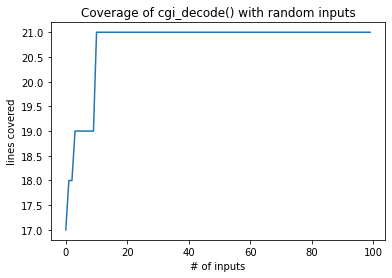

In [34]:
all_coverage, cumulative_coverage = \
    population_coverage(hundred_inputs(), cgi_decode)

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(cumulative_coverage)
plt.title('Coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

In [35]:
runs = 100

# Create an array with TRIALS elements, all zero
sum_coverage = [0] * trials

for run in range(runs):
    all_coverage, coverage = population_coverage(hundred_inputs(), cgi_decode)
    assert len(coverage) == trials
    for i in range(trials):
        sum_coverage[i] += coverage[i]

average_coverage = []
for i in range(trials):
    average_coverage.append(sum_coverage[i] / runs)

Text(0, 0.5, 'lines covered')

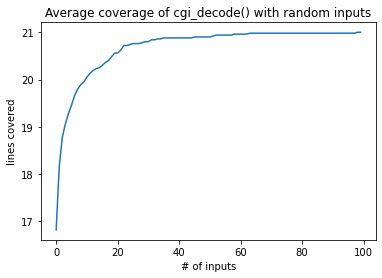

In [36]:
plt.plot(average_coverage)
plt.title('Average coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

In [37]:
cgi_c_code = """
/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>

"""

In [38]:
cgi_c_code += r"""
int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}
"""

In [39]:
cgi_c_code += r"""
int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%') {
            int digit_high = *++s;
            int digit_low = *++s;
            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
            }
            else
                return -1;
        }
        else
            *t++ = *s;
        s++;
    }
    *t = '\0';
    return 0;
}
"""

In [40]:
cgi_c_code += r"""
int main(int argc, char *argv[]) {
    init_hex_values();

    if (argc >= 2) {
        char *s = argv[1];
        char *t = malloc(strlen(s) + 1); /* output is at most as long as input */
        int ret = cgi_decode(s, t);
        printf("%s\n", t);
        return ret;
    }
    else
    {
        printf("cgi_decode: usage: cgi_decode STRING\n");
        return 1;
    }
}
"""

In [41]:
with open("cgi_decode.c", "w") as f:
    f.write(cgi_c_code)

In [42]:
from bookutils import print_file

print_file("cgi_decode.c")

/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>


int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}

int cgi_decode(char *s, char *t) {
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%') {
            int digit_high = *++s;
            int digit_low = *++s;
            if (hex_values[digit_high] >= 0 && 

In [43]:
!cc --coverage -o cgi_decode cgi_decode.c

In [44]:
!./cgi_decode 'Send+mail+to+me%40fuzzingbook.org'

Send mail to me@fuzzingbook.org


In [45]:
!gcov cgi_decode.c

File 'cgi_decode.c'
Lines executed:91.43% of 35
Creating 'cgi_decode.c.gcov'

Lines executed:91.43% of 35


In [46]:
lines = open('cgi_decode.c.gcov').readlines()
for i in range(30, 50):
    print(lines[i], end='')

       32:   27:    while (*s != '\0') {
       31:   28:        if (*s == '+')
        3:   29:            *t++ = ' ';
       28:   30:        else if (*s == '%') {
        1:   31:            int digit_high = *++s;
        1:   32:            int digit_low = *++s;
        1:   33:            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
        1:   34:                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
        -:   35:            }
        -:   36:            else
    #####:   37:                return -1;
        -:   38:        }
        -:   39:        else
       27:   40:            *t++ = *s;
       31:   41:        s++;
        -:   42:    }
        1:   43:    *t = '\0';
        1:   44:    return 0;
        -:   45:}
        -:   46:


In [47]:
def read_gcov_coverage(c_file):
    gcov_file = c_file + ".gcov"
    coverage = set()
    with open(gcov_file) as file:
        for line in file.readlines():
            elems = line.split(':')
            covered = elems[0].strip()
            line_number = int(elems[1].strip())
            if covered.startswith('-') or covered.startswith('#'):
                continue
            coverage.add((c_file, line_number))
    return coverage

In [48]:
coverage = read_gcov_coverage('cgi_decode.c')

list(coverage)[:5]

[('cgi_decode.c', 55),
 ('cgi_decode.c', 52),
 ('cgi_decode.c', 12),
 ('cgi_decode.c', 15),
 ('cgi_decode.c', 24)]

In [49]:
from ExpectError import ExpectError

with ExpectError():
    for i in range(trials):
        try:
            s = fuzzer()
            cgi_decode(s)
        except ValueError:
            pass

Traceback (most recent call last):
  File "/tmp/ipykernel_7011/3815711187.py", line 7, in <module>
    cgi_decode(s)
  File "/tmp/ipykernel_7011/1071239422.py", line 22, in cgi_decode
    digit_high, digit_low = s[i + 1], s[i + 2]
IndexError: string index out of range (expected)


In [50]:
s

'82 202*&<1&($34\'"/\'.<5/!8"\'5:!4))%;'

In [51]:
import os
import glob

for file in glob.glob("cgi_decode") + glob.glob("cgi_decode.*"):
    os.remove(file)

In [52]:
cgi_decode('asd%')
cgi_decode('asd%1')

IndexError: string index out of range

In [53]:
def cgi_decode(s: str) -> str:
    """Decode the CGI-encoded string `s`:
       * replace '+' by ' '
       * replace "%xx" by the character with hex number xx.
       Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_values = {
        '0': 0, '1': 1, '2': 2, '3': 3, '4': 4,
        '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
        'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15,
        'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15,
    }

    t = ""
    i = 0
    while i < len(s):
        c = s[i]
        if c == '+':
            t += ' '
        elif c == '%' and i < len(s) - 2:
            digit_high, digit_low = s[i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError("Invalid encoding")
        else:
            t += c
        i += 1
    return t

In [54]:
cgi_decode('asd%')
cgi_decode('asd%1')
cgi_decode('asd%22')

'asd"'

In [55]:
runs = 100

# Create an array with TRIALS elements, all zero
sum_coverage = [0] * trials

for run in range(runs):
    all_coverage, coverage = population_coverage(hundred_inputs(), cgi_decode)
    assert len(coverage) == trials
    for i in range(trials):
        sum_coverage[i] += coverage[i]

average_coverage = []
for i in range(trials):
    average_coverage.append(sum_coverage[i] / runs)

In [56]:
cgi_c_code = r"""
/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>


int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}

int cgi_decode(char *s, char *t) {
    unsigned int index = 0;
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%' && index < strlen(s) - 2) {
            int digit_high = *++s;
            int digit_low = *++s;
            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
            }
            else
                return -1;
        }
        else
            *t++ = *s;
        s++;
        index += 1;
    }
    *t = '\0';
    return 0;
}

int main(int argc, char *argv[]) {
    init_hex_values();

    if (argc >= 2) {
        char *s = argv[1];
        char *t = malloc(strlen(s) + 1); /* output is at most as long as input */
        int ret = cgi_decode(s, t);
        printf("%s\n", t);
        return ret;
    }
    else
    {
        printf("cgi_decode: usage: cgi_decode STRING\n");
        return 1;
    }
}
"""

In [57]:
with open("cgi_decode.c", "w") as f:
    f.write(cgi_c_code)
    
print_file("cgi_decode.c")
!cc --coverage -o cgi_decode cgi_decode.c
!./cgi_decode 's;alfadkaj%259'
!gcov cgi_decode.c

lines = open('cgi_decode.c.gcov').readlines()
for i in range(30, 50):
    print(lines[i], end='')
    
coverage = read_gcov_coverage('cgi_decode.c')
for file in glob.glob("cgi_decode") + glob.glob("cgi_decode.*"):
    os.remove(file)

/* CGI decoding as C program */

#include <stdlib.h>
#include <string.h>
#include <stdio.h>


int hex_values[256];

void init_hex_values() {
    for (int i = 0; i < sizeof(hex_values) / sizeof(int); i++) {
        hex_values[i] = -1;
    }
    hex_values['0'] = 0; hex_values['1'] = 1; hex_values['2'] = 2; hex_values['3'] = 3;
    hex_values['4'] = 4; hex_values['5'] = 5; hex_values['6'] = 6; hex_values['7'] = 7;
    hex_values['8'] = 8; hex_values['9'] = 9;

    hex_values['a'] = 10; hex_values['b'] = 11; hex_values['c'] = 12; hex_values['d'] = 13;
    hex_values['e'] = 14; hex_values['f'] = 15;

    hex_values['A'] = 10; hex_values['B'] = 11; hex_values['C'] = 12; hex_values['D'] = 13;
    hex_values['E'] = 14; hex_values['F'] = 15;
}

int cgi_decode(char *s, char *t) {
    unsigned int index = 0;
    while (*s != '\0') {
        if (*s == '+')
            *t++ = ' ';
        else if (*s == '%' && index < strlen(s) - 2) {
            int digit_high = *++s;
            int digit_low = 

}s;alfadkaj%259
File 'cgi_decode.c'
Lines executed:78.38% of 37
Creating 'cgi_decode.c.gcov'

Lines executed:78.38% of 37
        1:   27:    unsigned int index = 0;
       15:   28:    while (*s != '\0') {
       14:   29:        if (*s == '+')
    #####:   30:            *t++ = ' ';
      14*:   31:        else if (*s == '%' && index < strlen(s) - 2) {
    #####:   32:            int digit_high = *++s;
    #####:   33:            int digit_low = *++s;
    #####:   34:            if (hex_values[digit_high] >= 0 && hex_values[digit_low] >= 0) {
    #####:   35:                *t++ = hex_values[digit_high] * 16 + hex_values[digit_low];
        -:   36:            }
        -:   37:            else
    #####:   38:                return -1;
        -:   39:        }
        -:   40:        else
       14:   41:            *t++ = *s;
       14:   42:        s++;
       14:   43:        index += 1;
        -:   44:    }
        1:   45:    *t = '\0';
        1:   46:    return 0;


In [58]:
with Coverage() as cov:
    cgi_decode("a+b")
trace = cov.trace()
trace[:5]

[('cgi_decode', 8),
 ('cgi_decode', 9),
 ('cgi_decode', 8),
 ('cgi_decode', 9),
 ('cgi_decode', 8)]

In [ ]:
class BranchCoverage(Coverage):
    """Track branch coverage within a `with` block. Use as
    ```
    with Coverage() as cov:
        function_to_be_traced()
    c = cov.coverage()
    ```
    """

    
    def branch_coverage(self, ) -> Set:
        
        return ...